# Sentiment analysis


12/07/2023

Qintong Li

---

Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews. Sentiment analysis tools can scan this text to automatically determine the author’s attitude towards a topic. Companies use the insights from sentiment analysis to improve customer service and increase brand reputation.

This project would be mainly focus on a sentiment analysis for a tweets dataset from Kaggle, with some necessary statistic testing process.

In this project, the following points will be covered:

1. Counting key words in the given text.
2. Use of treemap and wordcloud.
3. Failure of statistical tools.

dataset source: https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets


## Import Data

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("/content/sentiment-emotion-labelled_Dell_tweets.csv")

### Initial stage data exploration

In [3]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [4]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [45]:
list_text=list(df["Text"])
list_text[0]

'@Logitech @apple @Google @Microsoft @Dell @Lenovo #WhatIf QWERTY were modified for programmers so things like brackets, parens, quotes, operators, etc. moved to the middle near G-H splitting left/right brackets to separate hands, and relieving the less dextrous pinky finger?'

### Counting frequencies of words

In [6]:
from collections import Counter

count = Counter()
for text in df['Text']:
    for word in text.split(sep="@"):
        count[word] += 1

# Find most common 10 words from the Pandas dataframe
common_words=count.most_common(20)
common_words

[('', 14953),
 ('Dell ', 7840),
 ('MichaelDell ', 1580),
 ('DellCares ', 1095),
 ('Twitter ', 1082),
 ('elonmusk ', 1051),
 ('Microsoft ', 628),
 ('HP ', 596),
 ('Dell', 549),
 ('Alienware ', 523),
 ('Dell_IN ', 461),
 ('DellTech ', 430),
 ('starwars ', 342),
 ('TheRock ', 337),
 ('ScienceNews ', 336),
 ('steveaustinBSR\xa0 ', 334),
 ('WWEUniverse\xa0 ', 334),
 ('playstation ', 333),
 ('JohnCena #psndown ', 331),
 ('CountryMusic\xa0', 326)]

## Cleaning results
* Remove all null values
* Remove all zero values

In [7]:
df_common_wd= pd.DataFrame(common_words)
df_common_wd

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [8]:
df_common_wd.dropna()

,0,1
0,,14953
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523


In [9]:
df_common_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [10]:
df_common_wd=df_common_wd.drop(0)

In [11]:
df_common_wd= df_common_wd.rename(columns={0: 'word'})
df_common_wd= df_common_wd.rename(columns={1: 'count'})
df_common_wd.style.background_gradient(cmap='Blues')

,word,count
1,Dell,7840
2,MichaelDell,1580
3,DellCares,1095
4,Twitter,1082
5,elonmusk,1051
6,Microsoft,628
7,HP,596
8,Dell,549
9,Alienware,523
10,Dell_IN,461


## Display results in different methods
* Bar chart
* Tree map
* Word cloud

In [12]:
import plotly.express as px

fig = px.bar(df_common_wd, x="word", y="count")
fig.show()

In [13]:
fig2= px.treemap(df_common_wd, path=['word'], values='count')
fig2.show()

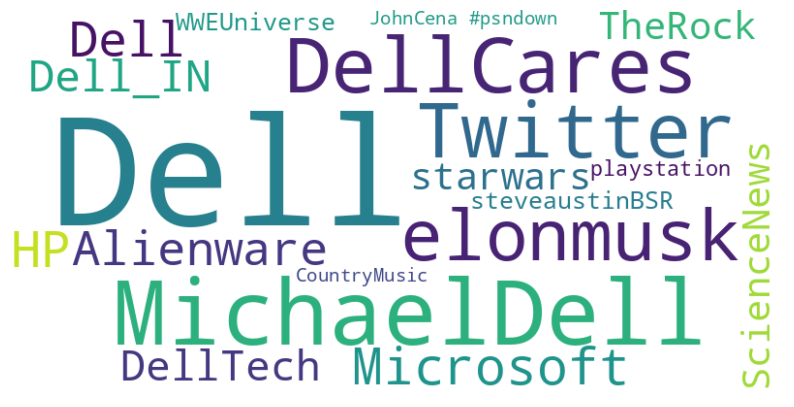

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the dataframe columns 'word' and 'count'
word_count_dict = dict(zip(df_common_wd['word'], df_common_wd['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Extra practices

1. Look for the most common sentiment and emotion in both respective columns. Plot the most common words in a treemap or word count as above.

In [37]:
count = Counter()
for sen in df['sentiment']:
        count[sen] += 1

# Find most common 10 words from the Pandas dataframe
common_sentiment=count.most_common(20)
common_sentiment

[('negative', 10556), ('positive', 7366), ('neutral', 7048)]

In [38]:
df_sentiment= pd.DataFrame(common_sentiment)
df_sentiment= df_sentiment.rename(columns={0: 'sentiment'})
df_sentiment= df_sentiment.rename(columns={1: 'count'})
df_sentiment

,sentiment,count
0,negative,10556
1,positive,7366
2,neutral,7048


In [15]:
count = Counter()
for emo in df['emotion']:
        count[emo] += 1

# Find most common 10 words from the Pandas dataframe
common_emotions=count.most_common(20)
common_emotions

[('anger', 7520),
 ('joy', 6326),
 ('anticipation', 5171),
 ('disgust', 3000),
 ('sadness', 1328),
 ('optimism', 1225),
 ('fear', 366),
 ('surprise', 34)]

In [16]:
df_common_em= pd.DataFrame(common_emotions)
df_common_em

,0,1
0,anger,7520
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [17]:
df_common_em.dropna()
df_common_em=df_common_em.drop(0)

In [25]:
df_common_em= df_common_em.rename(columns={0: 'emotions'})
df_common_em= df_common_em.rename(columns={1: 'frequency'})
df_common_em.style.background_gradient(cmap='Spectral')

,emotions,frequency
1,joy,6326
2,anticipation,5171
3,disgust,3000
4,sadness,1328
5,optimism,1225
6,fear,366
7,surprise,34


In [19]:
import plotly.express as px

fig = px.bar(df_common_em, x="emotions", y="frequency")
fig.show()

In [20]:
fig2= px.treemap(df_common_em, path=['emotions'], values='frequency')
fig2.show()

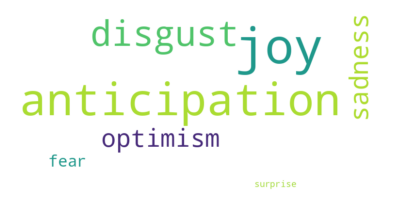

In [21]:
# Create a dictionary from the dataframe columns 'emotions' and 'frequency'
emotion_frequency_dict = dict(zip(df_common_em['emotions'], df_common_em['frequency']))

# Generate the word cloud
emotioncloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_frequency_dict)

# Plot the word cloud
plt.figure(figsize=(5, 3))
plt.imshow(emotioncloud, interpolation='bilinear')
plt.axis('off')
plt.show()


2. Filter out the positive sentiment's texts from the initial dataframe, count and show what are the main words from this categoty. Do the same for the negative sentiments.

In [28]:
df_positive = df.loc[df['sentiment']=='positive']

count_p = Counter()
for text_p in df_positive['Text']:
    for word_p in text_p.split(sep="@"):
        count_p[word_p] += 1

# Find most common 10 words from the Pandas dataframe
common_words_p=count_p.most_common(20)

df_common_wd_p= pd.DataFrame(common_words_p)

df_common_wd_p.dropna()
df_common_wd_p = df_common_wd_p.drop(0)

df_common_wd_p= df_common_wd_p.rename(columns={0: 'word'})
df_common_wd_p= df_common_wd_p.rename(columns={1: 'count'})
df_common_wd_p.style.background_gradient(cmap='Spectral')

,word,count
1,Dell,1910
2,MichaelDell,329
3,Twitter,318
4,elonmusk,292
5,Alienware,216
6,intelcanada,158
7,DellTech,143
8,intel,130
9,"Dell,",120
10,HP,111


In [27]:
df_negative = df.loc[df['sentiment']=='negative']

count_n = Counter()
for text_n in df_negative['Text']:
    for word_n in text_n.split(sep="@"):
        count_n[word_n] += 1

# Find most common 10 words from the Pandas dataframe
common_words_n=count_n.most_common(20)

df_common_wd_n= pd.DataFrame(common_words_n)

df_common_wd_n.dropna()
df_common_wd_n = df_common_wd_n.drop(0)

df_common_wd_n= df_common_wd_n.rename(columns={0: 'word'})
df_common_wd_n= df_common_wd_n.rename(columns={1: 'count'})
df_common_wd_n.style.background_gradient(cmap='Spectral')

,word,count
1,Dell,3058
2,DellCares,855
3,MichaelDell,552
4,Dell,337
5,Dell_IN,322
6,HP,244
7,elonmusk,212
8,Twitter,209
9,JuddLegum,163
10,NRCC,142


# Statistical analysis:

Chi-square test: We can use a chi-square test to examine the association between categorical variables in the dataset. For example,we could investigate if there is a significant association between sentiment (positive, negative, neutral) and emotions (joy, sadness, anger, etc.) in the tweets.

We can apply the central limit theorem to our dataset since it is a large dataset which assume our data follow a normal distribution.

To perform the Chi-Square test read and follow the documentation from SciPy:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

Follow the exemple given in the documentation, you would need to create a contengency table first of your data of interest before employing the stat test.

A contingency table, also known as a cross-tabulation table or a contingency table of frequencies, is a table that displays the joint distribution of two or more categorical variables. It shows the counts or frequencies of observations falling into various combinations of categories for the variables being studied.

Don't forget to formulate your hypothesis first.

In [41]:
df_stats= df.copy(deep=True)
df_stats= df.dropna()
df_stats.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [42]:
from scipy.stats import chi2_contingency

# Create a contingency table from the two categorical variables
contingency_table = pd.crosstab(df_stats['sentiment'], df_stats['emotion'])
contingency_table

emotion,anger,anticipation,disgust,fear,joy,optimism,sadness,surprise
sentiment,,,,,,,,
negative,6763,315,2089,170,177,91,936,15
neutral,604,3674,853,163,1074,341,330,9
positive,153,1182,58,33,5075,793,62,10


In [43]:
# Perform the Chi-square test

res = chi2_contingency(contingency_table , lambda_=None)
# Print the test statistics and p-value
print("Chi-square statistic:", res.statistic, "p-value:",  res.pvalue)

Chi-square statistic: 23014.009167758493 p-value: 0.0


In [44]:
#  Perform the G-test

res = chi2_contingency(contingency_table , lambda_="log-likelihood")

# Print the test statistic and p-value
print("G-test statistic:", res.statistic, "p-value:", res.pvalue)

G-test statistic: 24384.078944448527 p-value: 0.0


p-value of zero: when the sample size is small, the statistical power to detect deviations from the null hypothesis is limited. It may require a relatively large deviation from the null hypothesis to obtain a significant result(a small p-value).